In [232]:
import torch
import random
from torch import nn

In [279]:
x= torch.ones((6, 8))
x[:, 2:6] = 0
K = torch.tensor([[1.0, -1.0],[1.0, -1.0]])
Y = corr2d(x, K)

Y.shape

torch.Size([5, 7])

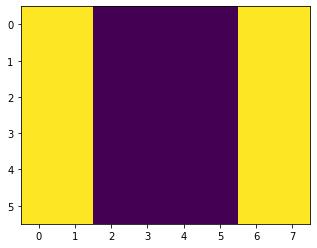

In [280]:
plt.imshow(x)

In [281]:
# model
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.set_printoptions(sci_mode=False)
class conv2d(torch.nn.Module):
  def __init__(self):
    super(conv2d, self).__init__()
    self.conv = nn.LazyConv2d(1, kernel_size=(2,2), bias=False)
  def forward(self, x):
    x = self.conv(x)
    
    return x

In [282]:
model = conv2d()
model

conv2d(
  (conv): LazyConv2d(0, 1, kernel_size=(2, 2), stride=(1, 1), bias=False)
)

epoch 10, loss 1.208
epoch 20, loss 0.816
epoch 30, loss 0.571
epoch 40, loss 0.403
epoch 50, loss 0.285
epoch 60, loss 0.202
epoch 70, loss 0.143
epoch 80, loss 0.101
epoch 90, loss 0.071
epoch 100, loss 0.051


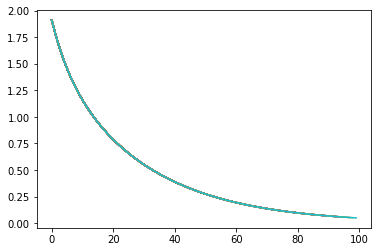

In [283]:
lr = 3e-2  # Learning rate
losses = []
loss_function = torch.nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=0.03, momentum=0)

for i in range(100):
    x = x.reshape((1, 1, 6, 8))
    Y = Y.reshape((1, 1, 5, 7))
    model.zero_grad()

    Y_hat = model(x)
    l = loss_function(Y_hat , Y)
    l = l.mean()
    l.backward()
    # Update the kernel

    optim.step()

    loss = l.item()
    losses.append(loss)
    plt.plot(losses)
    if (i + 1) % 10 == 0:
        print(f'epoch {i + 1}, loss {l.mean():.3f}')

In [277]:
model.conv.weight.data.reshape((2, 2))

tensor([[ 1.0447, -0.8966],
        [ 0.9491, -1.0972]])

In [271]:

model.zero_grad()
out = conv2d(torch.tensor(x.reshape((1, 1, 6, 8)).float())
out.retain_grad()
loss = loss_function(out, torch.tensor(Y_test[samp]).long()).mean()
loss.retain_grad()
loss.backward()
imshow(model.l1.weight.grad)
figure()
imshow(model.l2.weight.grad)

SyntaxError: invalid syntax (<ipython-input-271-a8f9ac52e3bf>, line 3)

In [238]:
def corr2d(X, K):  
    """2D cross-correlation"""
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

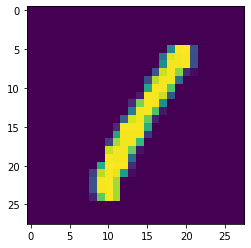

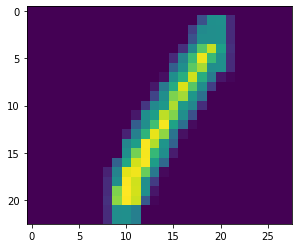

In [87]:
x = X_train[3]
plt.figure()
plt.imshow(x)
k = np.array([[0,1,0], [0,1,0]]).reshape(-1,1)
plt.figure()

plt.imshow(corr2d(x,k))

In [88]:
def conv2d(X,kernel_size):
    (h,w) = kernel_size
    W = np.random.uniform(0,1 , size = (h,w)).reshape(h, w)
    
    print(W.shape)
    return corr2d(X,W) 

In [89]:
X = np.ones((6, 8))
X[:, 2:6] = 0
X.shape

(6, 8)

In [90]:
K = np.array([[1.0, -1.0]])
Y = corr2d(X, K)
Y

array([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [91]:

lr = 3e-2  # Learning rate

for i in range(10):
    Y_hat = conv2d(X, (1,2))
    l = (Y_hat - Y) ** 2
    conv2d.zero_grad()
    l.sum().backward()
    # Update the kernel
    conv2d.weight.data[:] -= lr * conv2d.weight.grad
    if (i + 1) % 2 == 0:
        print(f'epoch {i + 1}, loss {l.sum():.3f}')

(1, 2)


AttributeError: 'function' object has no attribute 'zero_grad'

In [ ]:
Y = corr2d(X, K)
Y